In [2]:
%pylab inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.io
import math

Populating the interactive namespace from numpy and matplotlib


## Email Spam classification using logistic regression model

### Load Data

In [3]:
file = scipy.io.loadmat('data/spam.mat')

In [4]:
X_test = file['Xtest']
X_train = file['Xtrain']
y_train = file['ytrain']

### Try using three Input Data Transformation Methods
1. Standard Transformation
2. Log Transformation
3. Binary Transformation

In [25]:
def stand_trans(X):
    mean = np.average(X)
    std = np.std(X)
    return (X - mean)/std
def log_trans(X):
    return np.log(X + 0.1)
def bin_trans(X):
    return (X > 0).astype(int)
#Transformations of X_train.
X_train_stand = stand_trans(X_train)
X_train_log = log_trans(X_train)
X_train_bin = bin_trans(X_train)

### Using Gradient Descent

In [26]:
def train_gd(X_train, y_train, alpha=0.1, reg=0, num_iter=10000, loss_calc = False):
    ''' Build a model from X_train -> y_train using batch gradient descent '''
    # X --  N * D
    # y --- N * k
    # W arbiturally choose one D * k
    loss = []
    D = X_train.shape[1]
    W = np.zeros([D, 1])
    for i in range(0, num_iter):
        mu = sigmoid(X_train, W)
        gradient = 2*reg*W - X_train.T.dot(y_train - mu)
        W -= alpha * gradient
        if (plot):
            l = calc_loss(X_train, y_train, W, reg)
            loss.append(l[0][0])
    return (W, loss)

In [27]:
def predict(model, X_trans):
    ''' From model and data points, output prediction vectors '''
    pred_labels = X_trans.dot(model)
    return pred_labels

In [28]:
def sigmoid(X, W):
    return 1 / (1 + math.e ** (-X.dot(W)))

In [29]:
def calc_loss_2(X, y, W, reg):
    pen = 2 * reg * W.T.dot(W)
    print(len(X))
    for i in range(0, len(X)):
        mu = sigmoid(X[i], W)
        if (mu != 0 and mu != 1):
            pen -= y[i] * np.log(mu) + (1 - y[i]) * np.log(1 - mu)
    return pen

In [30]:
def calc_loss(X, y, W, reg):
    mu = sigmoid(X, W)
    return 2 * reg * W - y.T.dot(np.log(mu)) - (1 - y).T.dot(np.log(1 - mu))

1990.10053583


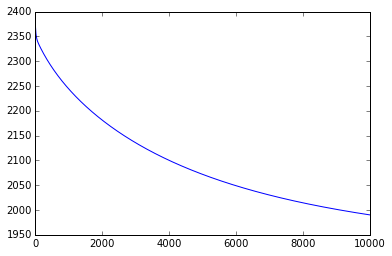

In [22]:
alpha = 1e-6
reg = 0.05
num_iter_stand = 10000
model_stand, loss_stand = train_gd(X_train_stand, y_train, alpha, reg, num_iter_stand, loss_calc = True)
labels_stand = predict(model_stand, X_test)
labels_stand
plt.plot([i for i in range(num_iter_stand)], loss_stand)

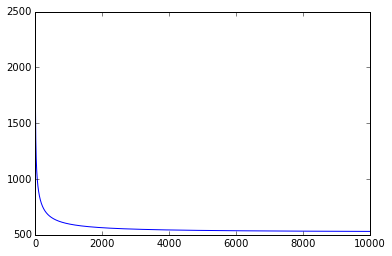

530.38558552666734

In [33]:
alpha = 1e-5
reg = 0.05
num_iter_log = 10000
model_log, loss_log = train_gd(X_train_log, y_train, alpha, reg, num_iter_log)
X_test_stand = stand_trans(X_test)
labels_log = predict(model_log, X_test_stand)
labels_log
plt.plot([i for i in range(num_iter_log)], loss_log)
plt.show()
min(loss_log)

In [24]:
labels = (labels_log > 0.5).astype(int).T[0]
ID = np.array([i + 1 for i in range(labels_log.shape[0])])
result = np.dstack((ID, labels))[0].astype(int)
np.savetxt('test_label_log.csv', result, header = 'ID,Category', fmt = '%d', delimiter = ",", comments = "")

603.17534574620856

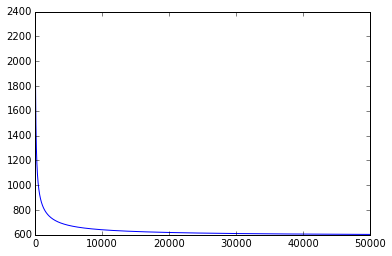

In [36]:
alpha = 1e-5
reg = 0.125
num_iter_bin = 50000
model_bin, loss_bin = train_gd(X_train_bin, y_train, alpha, reg, num_iter_bin)
X_test_bin = bin_trans(X_test)
labels_bin = predict(model_bin, X_test_bin)
labels_bin
plt.plot([i for i in range(num_iter_bin)], loss_bin)
min(loss_bin)

In [37]:
labels = (labels_bin > 0.5).astype(int).T[0]
ID = np.array([i + 1 for i in range(labels_log.shape[0])])
result = np.dstack((ID, labels))[0].astype(int)
np.savetxt('test_label_bin.csv', result, header = 'ID,Category', fmt = '%d', delimiter = ",", comments = "")

### Using Stochastic Gradient Descent with fixed learning rate

In [47]:
def train_sgd(X_train, y_train, alpha=0.1, reg=0, num_iter=10000):
    ''' Build a model from X_train -> y_train using stochastic gradient descent '''
    loss = []
#     best = None
    D = X_train.shape[1]
    W = np.zeros([D, 1])
    for i in range(0, num_iter):
        u = np.random.randint(0, D)
        gradient = 2 * reg * W - np.outer(X_train[u], (y_train[u] - sigmoid(X_train[u], W)))
        W -= alpha * gradient
        l = calc_loss(X_train, y_train, W, reg)
        loss.append(l[0][0])
    return (W, loss)

2195.45300823


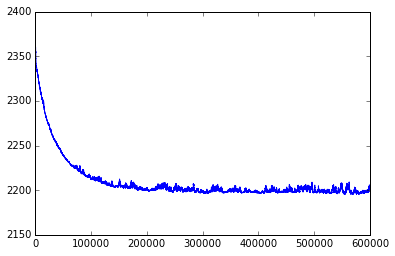

In [49]:
alpha = 1e-4
reg = 0.07
num_iter_stand = 600000
model_stand, loss_stand = train_sgd(X_train_stand, y_train, alpha, reg, num_iter_stand)
labels_stand = predict(model_stand, X_test)
print(min(loss_stand))
plt.plot([i for i in range(num_iter_stand)], loss_stand)

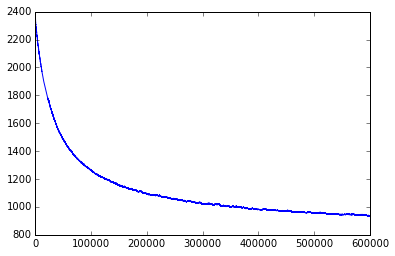

933.94868973549637

In [51]:
alpha = 1e-5
reg = 0.06
num_iter_log = 600000
model_log, loss_log = train_sgd(X_train_log, y_train, alpha, reg, num_iter_log)
X_test_stand = stand_trans(X_test)
labels_log = predict(model_log, X_test_stand)
labels_log
plt.plot([i for i in range(num_iter_log)], loss_log)
plt.show()
min(loss_log)

603.17534574620856

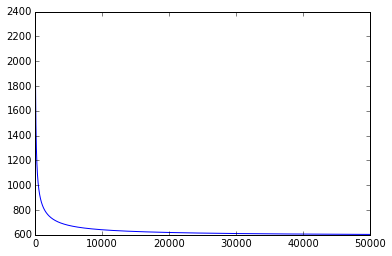

In [52]:
alpha = 1e-5
reg = 0.125
num_iter_bin = 50000
model_bin, loss_bin = train_gd(X_train_bin, y_train, alpha, reg, num_iter_bin)
X_test_bin = bin_trans(X_test)
labels_bin = predict(model_bin, X_test_bin)
labels_bin
plt.plot([i for i in range(num_iter_bin)], loss_bin)
min(loss_bin)

It seems that with that strategy, the stochastic gradient descent converges faster.

### Using Stochastic Gradient Descent with decaying learning rate

In [53]:
def train_sgd_v2(X_train, y_train, alpha=0.1, reg=0, num_iter=10000):
    ''' Build a model from X_train -> y_train using stochastic gradient descent '''
    loss = []
#     best = None
    D = X_train.shape[1]
    W = np.zeros([D, 1])
    for i in range(0, num_iter):
        alpha /= i # Learning rate decays here
        u = np.random.randint(0, D)
        gradient = 2 * reg * W - np.outer(X_train[u], (y_train[u] - sigmoid(X_train[u], W)))
        W -= alpha * gradient
        l = calc_loss(X_train, y_train, W, reg)
        loss.append(l[0][0])
    return (W, loss)

2238.89352


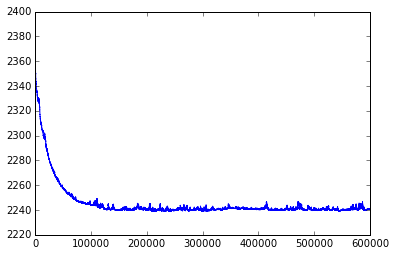

In [57]:
alpha = 1e-4
reg = 0.125
num_iter_stand = 600000
model_stand, loss_stand = train_sgd(X_train_stand, y_train, alpha, reg, num_iter_stand)
labels_stand = predict(model_stand, X_test)
print(min(loss_stand))
plt.plot([i for i in range(num_iter_stand)], loss_stand)

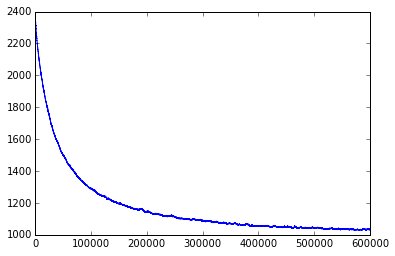

1027.9059247396322

In [58]:
alpha = 1e-5
reg = 0.125
num_iter_log = 600000
model_log, loss_log = train_sgd(X_train_log, y_train, alpha, reg, num_iter_log)
X_test_stand = stand_trans(X_test)
labels_log = predict(model_log, X_test_stand)
labels_log
plt.plot([i for i in range(num_iter_log)], loss_log)
plt.show()
min(loss_log)

603.17534574620856

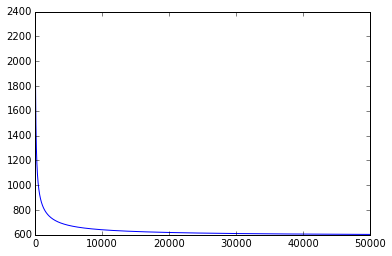

In [56]:
alpha = 1e-5
reg = 0.125
num_iter_bin = 50000
model_bin, loss_bin = train_gd(X_train_bin, y_train, alpha, reg, num_iter_bin)
X_test_bin = bin_trans(X_test)
labels_bin = predict(model_bin, X_test_bin)
labels_bin
plt.plot([i for i in range(num_iter_bin)], loss_bin)
min(loss_bin)

## Result Report

I used Gradient Descent to train the model, used lambda = 0.125, learning_rate = 1e-5 and iteration = 50000.
I finally get a 0.93 accuracy on Kaggle.